In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
model_path = 'best_model/best_model.npz'
output_dir = os.path.dirname(model_path)

params = np.load(model_path)
W1, W2 = params['W1'], params['W2']

# Weight distribution histograms

Weight distribution histograms saved to best_model\weight_distributions.png


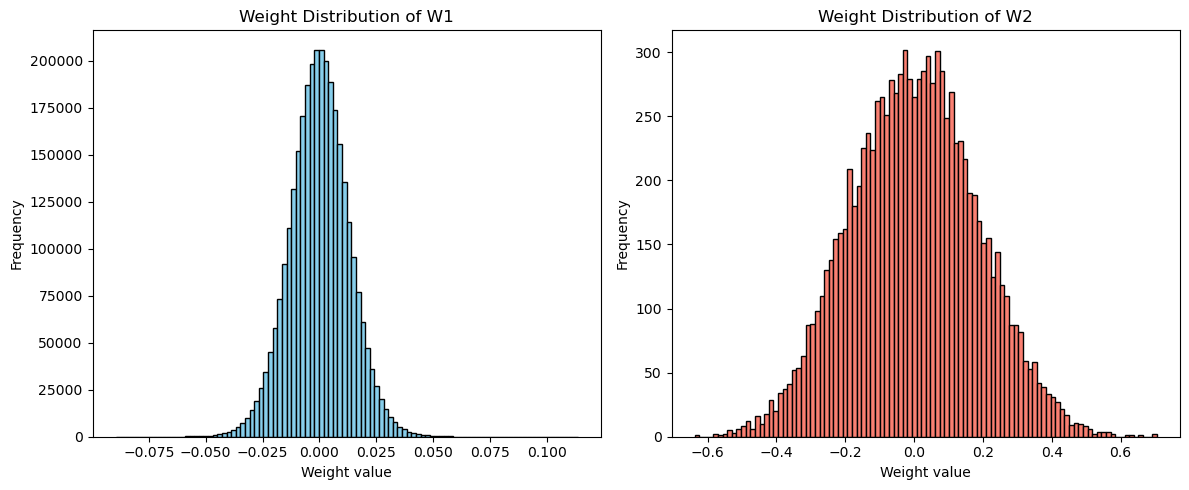

In [2]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(W1.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title('Weight Distribution of W1')
plt.xlabel('Weight value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(W2.flatten(), bins=100, color='salmon', edgecolor='black')
plt.title('Weight Distribution of W2')
plt.xlabel('Weight value')
plt.ylabel('Frequency')

plt.tight_layout()
save_path = os.path.join(output_dir, 'weight_distributions.png')
plt.savefig(save_path, dpi=300)
print(f"Weight distribution histograms saved to {save_path}")


# W1 filter visualization

Saved W1 filter visualization to best_model\W1_visualization.png


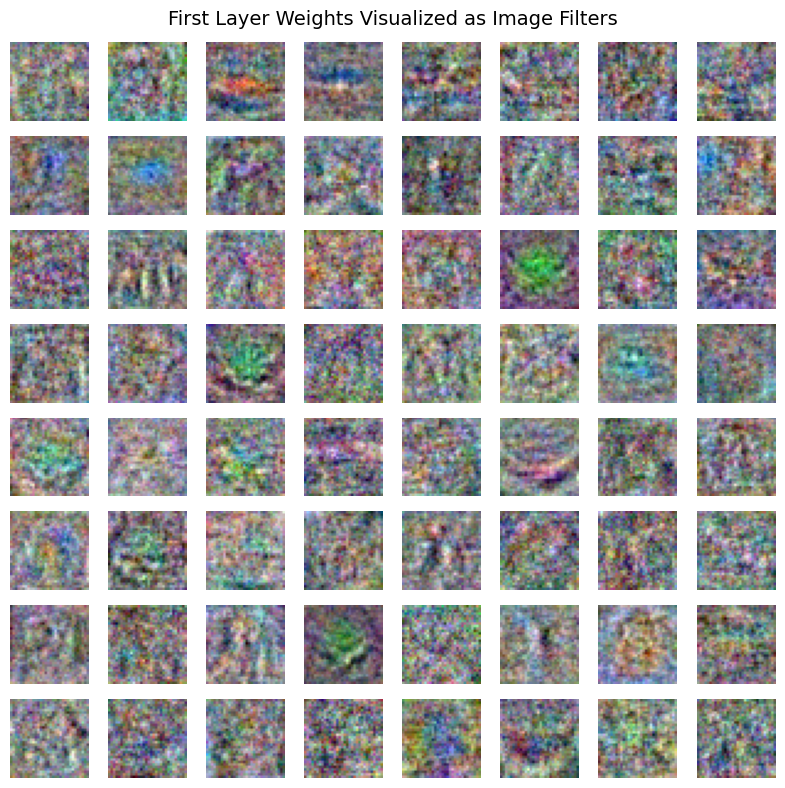

In [3]:
def visualize_W1_as_images(W1, save_dir, img_size=(32, 32, 3), max_filters=64):
    H, W, C = img_size
    hidden_size = W1.shape[1]
    filters_to_show = min(max_filters, hidden_size)

    plt.figure(figsize=(8, 8))
    for i in range(filters_to_show):
        weight_img = W1[:, i].reshape(H, W, C)
        weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min() + 1e-8)  # normalize

        plt.subplot(int(np.sqrt(filters_to_show)), int(np.ceil(filters_to_show / np.sqrt(filters_to_show))), i + 1)
        plt.imshow(weight_img)
        plt.axis('off')

    plt.suptitle("First Layer Weights Visualized as Image Filters", fontsize=14)
    plt.tight_layout()
    save_path = os.path.join(save_dir, 'W1_visualization.png')
    plt.savefig(save_path, dpi=300)
    print(f"Saved W1 filter visualization to {save_path}")

visualize_W1_as_images(W1, output_dir)


# Weight Heatmap

Saved Weight Heatmap to best_model\W1_heatmap.png
Saved Weight Heatmap to best_model\W2_heatmap.png


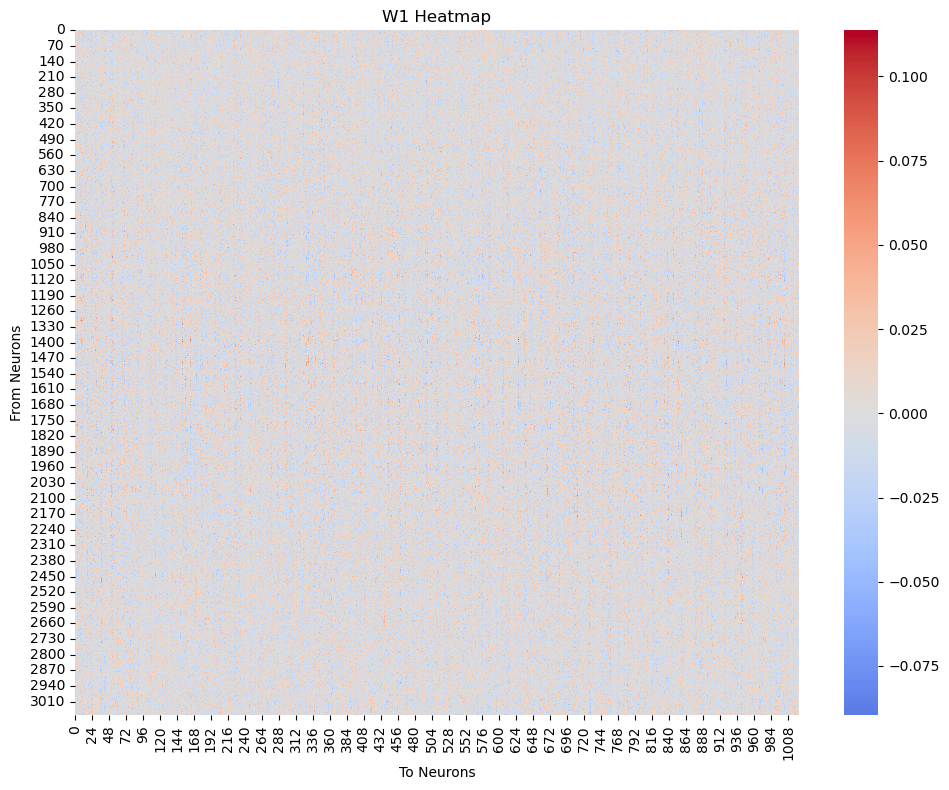

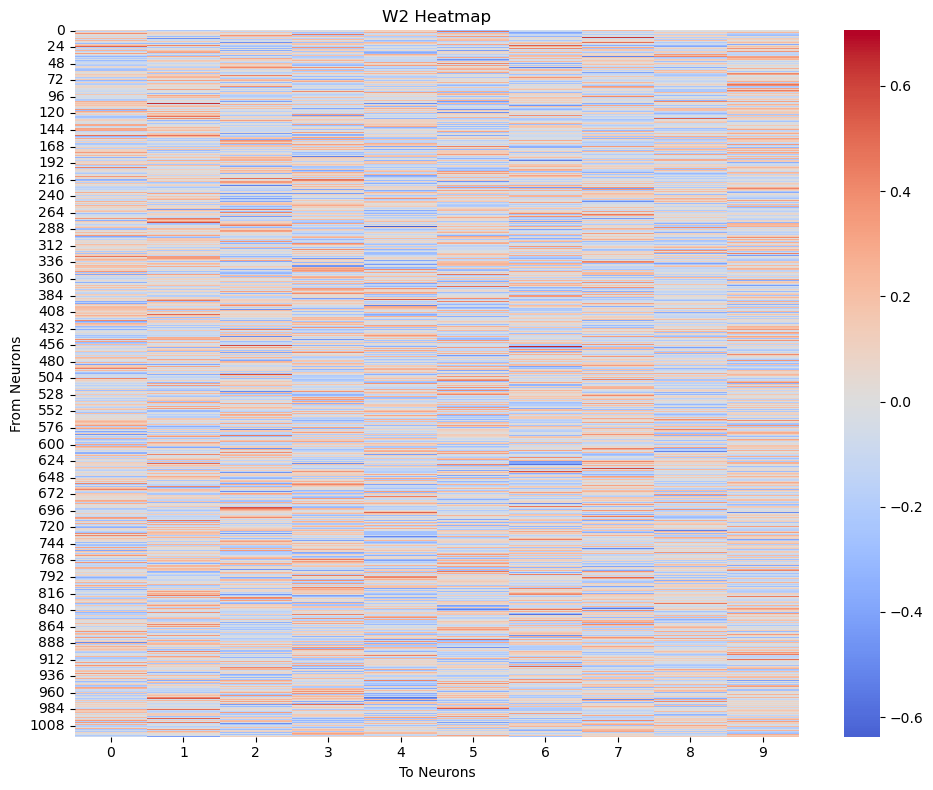

In [4]:
def visualize_weight_heatmap(weight_matrix, title, save_path):
    plt.figure(figsize=(10, 8))
    sns.heatmap(weight_matrix, cmap='coolwarm', center=0, cbar=True)
    plt.title(title)
    plt.xlabel("To Neurons")
    plt.ylabel("From Neurons")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    print(f"Saved Weight Heatmap to {save_path}")

# Save heatmaps
visualize_weight_heatmap(W1, 'W1 Heatmap', os.path.join(output_dir, 'W1_heatmap.png'))
visualize_weight_heatmap(W2, 'W2 Heatmap', os.path.join(output_dir, 'W2_heatmap.png'))


# Correlation of Weights among Class

Saved Correlation of Weights among Class to best_model\class_corr.png


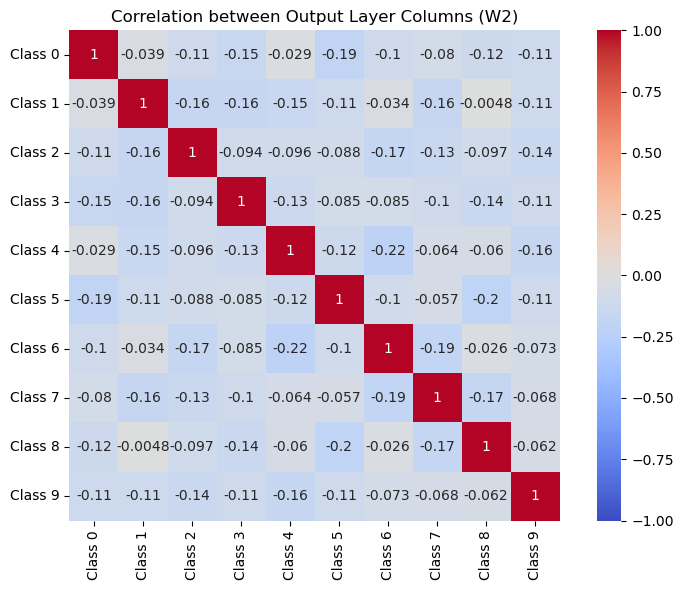

In [5]:
correlation_matrix = np.corrcoef(W2.T)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1,
            xticklabels=[f'Class {i}' for i in range(10)],
            yticklabels=[f'Class {i}' for i in range(10)])
plt.title("Correlation between Output Layer Columns (W2)")
plt.tight_layout()
save_path = os.path.join(output_dir, 'class_corr.png')
plt.savefig(save_path, dpi=300)
print(f"Saved Correlation of Weights among Class to {save_path}")
plt.show()
